<a href="https://colab.research.google.com/github/swapnilbpatil/Required-Notebook/blob/main/Mutual_Fund_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-1:Load dataset and check summary statistics**

In [53]:
import pandas as pd
import numpy as np

In [54]:
data=pd.read_csv('path.csv')

In [55]:
data.head()

,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,sectors_real_estate,sectors_consumer_defensive,sectors_healthcare,sectors_utilities,sectors_communication_services,sectors_energy,sectors_industrials,sectors_technology,price_earning,bonds_us_government,morningstar_return_rating,returns_ytd,returns_2017,returns_2016,returns_2015,returns_2014,returns_2013,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y,...,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83,category_84,category_85,category_86,category_87,category_88,category_89,category_90,category_91,category_92,category_93,category_94,category_95,category_96,category_97,category_98,category_99,category_100,category_101,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,3935,284820000,1.55,3,6.97,14.80,77.25,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4,-8.93,-1.57,3.50,2.97,14.41,8.70,0.00,0.00,0.00,3,-0.08,0.98,-0.29,9.56,-0.43,-4.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,13836,71810000,1.45,2,10.84,29.59,58.51,0.94,0.01,0.01,7.07,15.33,16.54,2.72,6.96,11.30,2.20,3.42,7.27,11.82,15.37,16.56,0.0,2,-1.04,8.74,4.04,-1.93,4.78,6.54,7.76,1.93,7.20,2,-1.23,0.60,0.22,3.97,0.49,3.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.54
2,8956,6880000000,0.94,4,0.78,99.22,0.00,0.00,0.00,0.00,4.96,10.35,28.78,9.68,2.67,4.47,4.89,0.00,6.21,18.23,9.76,16.69,0.0,4,2.93,12.34,24.65,-5.39,7.28,38.82,16.54,0.81,26.37,2,0.05,0.94,0.87,12.83,0.76,9.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
3,9142,399430000,1.00,2,0.51,99.49,0.00,0.00,0.00,0.00,5.61,27.77,10.69,3.01,10.94,0.00,0.00,8.74,2.72,21.62,8.90,15.51,0.0,2,-2.52,13.19,11.91,-9.30,1.93,33.51,17.17,0.41,28.00,3,-7.36,0.95,0.26,11.05,0.22,1.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
4,5796,656280000,2.69,4,7.78,23.60,68.49,0.11,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4,-5.85,7.88,-2.09,2.26,24.98,-0.06,0.00,0.00,0.00,4,4.33,1.09,0.05,13.01,-0.01,-0.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00


In [56]:
data.shape

(11898, 153)

In [57]:
data.describe()

,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,sectors_real_estate,sectors_consumer_defensive,sectors_healthcare,sectors_utilities,sectors_communication_services,sectors_energy,sectors_industrials,sectors_technology,price_earning,bonds_us_government,morningstar_return_rating,returns_ytd,returns_2017,returns_2016,returns_2015,returns_2014,returns_2013,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y,...,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83,category_84,category_85,category_86,category_87,category_88,category_89,category_90,category_91,category_92,category_93,category_94,category_95,category_96,category_97,category_98,category_99,category_100,category_101,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
count,11898.000000,1.189800e+04,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.0,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,...,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000
mean,8886.317196,2.428921e+09,1.019386,2.745503,6.869599,59.288643,30.404463,1.567409,0.368650,0.632453,4.297642,9.365082,12.655014,4.679681,5.057641,7.982295,2.486375,1.977793,6.606868,8.802305,12.463791,12.882462,0.0,2.737939,0.634440,13.331834,6.057529,-1.567084,3.619455,10.768712,7.537313,-0.709558,6.636470,2.751051,-0.330837,0.795578,0.417148,7.892832,0.481747,5.509313,...,0.004034,0.013027,0.006556,0.004034,0.001933,0.008321,0.003362,0.017986,0.025214,0.026475,0.014120,0.014120,0.005715,0.004455,0.009329,0.007816,0.008489,0.007312,0.007396,0.007816,0.009161,0.008069,0.005799,0.007228,0.005463,0.000252,0.000084,0.000336,0.001345,0.004875,0.001933,0.000252,0.019919,0.011094,0.034712,0.006640,0.469827,0.261809,0.268364,12.442643
std,5130.876028,1.018769e+10,0.615437,1.361566,11.777783,42.114027,38.794591,6.375753,2.435118,5.239956,8.405432,9.367823,12.402970,13.922656,6.217234,9.304558,7.279712,3.235702,15.033804,9.157999,12.172201,9.456463,0.0,1.367157,3.920083,11.271626,7.794135,5.530827,6.393264,15.653815,8.192781,6.124233,8.936011,1.395203,3.025798,0.501849,0.362815,5.341358,0.399031,72.716491,...,0.063390,0.113397,0.080705,0.063390,0.043926,0.090842,0.057887,0.132907,0.156782,0.160550,0.117991,0.117991,0.075386,0.066596,0.096141,0.088068,0.091747,0.085202,0.085686,0.088068,0.095279,0.089466,0.075935,0.084714,0.073714,0.015878,0.009168,0.018333,0.036648,0.069652,0.043926,0.015878,0.139729,0.104748,0.183056,0.081217,0.499110,0.439638,0.443127,23.614576
min,2.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-35.480000,-55.310000,-40.530000,-56

In [58]:
data=data.drop(columns=['Serial Number'])

In [59]:
data

,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,sectors_real_estate,sectors_consumer_defensive,sectors_healthcare,sectors_utilities,sectors_communication_services,sectors_energy,sectors_industrials,sectors_technology,price_earning,bonds_us_government,morningstar_return_rating,returns_ytd,returns_2017,returns_2016,returns_2015,returns_2014,returns_2013,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y,age_of_fund_yrs,...,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83,category_84,category_85,category_86,category_87,category_88,category_89,category_90,category_91,category_92,category_93,category_94,category_95,category_96,category_97,category_98,category_99,category_100,category_101,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,284820000,1.55,3,6.97,14.80,77.25,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4,-8.93,-1.57,3.50,2.97,14.41,8.70,0.00,0.00,0.00,3,-0.08,0.98,-0.29,9.56,-0.43,-4.57,6.065753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,71810000,1.45,2,10.84,29.59,58.51,0.94,0.01,0.01,7.07,15.33,16.54,2.72,6.96,11.30,2.20,3.42,7.27,11.82,15.37,16.56,0.0,2,-1.04,8.74,4.04,-1.93,4.78,6.54,7.76,1.93,7.20,2,-1.23,0.60,0.22,3.97,0.49,3.15,12.317808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.54
2,6880000000,0.94,4,0.78,99.22,0.00,0.00,0.00,0.00,4.96,10.35,28.78,9.68,2.67,4.47,4.89,0.00,6.21,18.23,9.76,16.69,0.0,4,2.93,12.34,24.65,-5.39,7.28,38.82,16.54,0.81,26.37,2,0.05,0.94,0.87,12.83,0.76,9.96,21.197260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
3,399430000,1.00,2,0.51,99.49,0.00,0.00,0.00,0.00,5.61,27.77,10.69,3.01,10.94,0.00,0.00,8.74,2.72,21.62,8.90,15.51,0.0,2,-2.52,13.19,11.91,-9.30,1.93,33.51,17.17,0.41,28.00,3,-7.36,0.95,0.26,11.05,0.22,1.96,10.057534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
4,656280000,2.69,4,7.78,23.60,68.49,0.11,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4,-5.85,7.88,-2.09,2.26,24.98,-0.06,0.00,0.00,0.00,4,4.33,1.09,0.05,13.01,-0.01,-0.89,6.682192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11893,2490000000,1.78,3,2.41,83.55,11.86,2.15,0.03,0.00,4.84,11.69,17.76,3.45,8.18,12.16,2.72,3.12,5.66,9.79,20.64,16.83,0.0,4,1.47,20.93,6.32,-1.67,4.74,23.87,14.77,-7.04,15.36,4,-1.40,1.46,0.58,9.39,0.67,4.16,12.783562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,64.18
11894,338690000,1.09,4,6.19,91.19,0.00,2.62,0.00,0.00,3.51,17.66,16.19,1.75,2.73,21.12,0.10,3.26,0.24,8.97,24.50,19.51,0.0,3,2.23,32.34,-5.08,5.44,-2.96,15.01,19.29,-16.47,4.7

# **Task-2:Hypothesis Testing**

In [60]:
#Importing header files
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [61]:
#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 11)   # Df = number of variable categories(in purpose) - 1

In [62]:
data['morningstar_return_rating']

0        4
1        2
2        4
3        2
4        4
        ..
11893    4
11894    3
11895    2
11896    3
11897    3
Name: morningstar_return_rating, Length: 11898, dtype: int64

In [63]:
return_rating=data['morningstar_return_rating'].value_counts()


In [64]:
print(return_rating.transpose())

3    3892
4    2628
2    2422
0    1236
5     956
1     764
Name: morningstar_return_rating, dtype: int64


In [65]:
risk_raing=data['morningstar_risk_rating'].value_counts()


In [66]:
print(risk_raing.transpose())    

3    3845
4    2614
2    2218
0    1236
5    1080
1     905
Name: morningstar_risk_rating, dtype: int64


In [67]:
observed = pd.concat([return_rating.transpose(),risk_raing.transpose()],axis=1,keys= ['return','risk'])

In [68]:
observed

,return,risk
3,3892,3845
4,2628,2614
2,2422,2218
0,1236,1236
5,956,1080
1,764,905


In [69]:
chi2, p, dof, ex=chi2_contingency(observed)

In [70]:
print(chi2, p, dof, ex)

28.75585318206671 2.5889934498733718e-05 5 [[3868.5 3868.5]
 [2621.  2621. ]
 [2320.  2320. ]
 [1236.  1236. ]
 [1018.  1018. ]
 [ 834.5  834.5]]


In [71]:
#return_rating= data['morningstar_return_rating'].value_counts()
#risk_rating = data['morningstar_risk_rating'].value_counts()
#print(return_rating.transpose())
#print(risk_rating.transpose())
#observed = pd.concat([return_rating.transpose(),risk_rating.transpose()],axis = 1,keys= ['return','risk'])
#print(observed)
#chi2, p, dof, ex=chi2_contingency(observed)

# **Task-3:Remove correlated features**

In [72]:
correlation = abs(data.corr())

In [73]:
correlation

,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,sectors_real_estate,sectors_consumer_defensive,sectors_healthcare,sectors_utilities,sectors_communication_services,sectors_energy,sectors_industrials,sectors_technology,price_earning,bonds_us_government,morningstar_return_rating,returns_ytd,returns_2017,returns_2016,returns_2015,returns_2014,returns_2013,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y,age_of_fund_yrs,...,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83,category_84,category_85,category_86,category_87,category_88,category_89,category_90,category_91,category_92,category_93,category_94,category_95,category_96,category_97,category_98,category_99,category_100,category_101,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
total_net_assets,1.000000,0.057418,0.147142,0.029626,0.047519,0.031818,0.032194,0.004189,0.013875,0.001509,0.040650,0.039277,0.032735,0.048490,0.045544,0.008028,0.045232,0.033168,0.006008,0.055287,0.037678,NaN,0.139871,0.034490,0.064489,0.020613,0.050477,0.058422,0.097136,0.116883,0.013674,0.077991,0.022675,0.054747,0.056595,0.113298,0.041371,0.122875,0.008086,0.120179,...,0.012265,0.007586,0.015980,0.012214,0.001776,0.013908,0.010640,0.010159,0.021158,0.019052,0.012626,0.017053,0.014753,0.008720,0.008693,0.007298,0.002068,0.007251,0.009252,0.011216,0.014335,0.018084,0.017769,0.016981,0.008217,0.003779,0.002186,0.004236,0.008477,0.005385,0.001583,0.003768,0.032656,0.005921,0.020474,0.001892,0.054020,0.059254,0.002057,0.043320
net_annual_expenses_ratio,0.057418,1.000000,0.108437,0.101058,0.154936,0.203864,0.016482,0.045152,0.033294,0.059771,0.066739,0.034316,0.063864,0.008107,0.037445,0.002273,0.020242,0.033953,0.051914,0.048575,0.106341,NaN,0.107226,0.008769,0.153326,0.063701,0.158570,0.022986,0.140276,0.148217,0.195221,0.144465,0.076074,0.110628,0.003388,0.008021,0.266907,0.155685,0.018059,0.121135,...,0.019691,0.032405,0.019255,0.037983,0.023363,0.036130,0.023300,0.054955,0.039196,0.051299,0.042242,0.060045,0.074567,0.066872,0.095211,0.086385,0.095582,0.084520,0.081969,0.090184,0.095974,0.087093,0.065357,0.080058,0.024809,0.009134,0.001946,0.014024,0.054633,0.066579,0.008594,0.015585,0.003425,0.006987,0.035547,0.049051,0.130365,0.128853,0.018996,0.236534
morningstar_rating,0.147142,0.108437,1.000000,0.077220,0.007753,0.040544,0.080241,0.005420,0.020478,0.002311,0.042027,0.025869,0.018130,0.034283,0.002880,0.021523,0.046210,0.010286,0.022253,0.054944,0.033876,NaN,0.963584,0.145754,0.196374,0.193698,0.100829,0.208354,0.166626,0.233426,0.026112,0.192249,0.491905,0.298682,0.367664,0.496375,0.327400,0.597008,0.027912,0.213902,...,0.003132,0.000845,0.065134,0.015372,0.001199,0.001492,0.012989,0.000250,0.016281,0.024673,0.015045,0.012952,0.014490,0.001380,0.010756,0.020561,0.006255,0.013664,0.017006,0.009345,0.013775,0.033513,0.120679,0.002104,0.012179,0.032024,0.018488,0.030245,0.006617,0.012620,0.000206,0.032024,0.006325,0.002707,0.014802,0.028804,0.069063,0.087448,0.008971,0.032368
portfolio_cash,0.029626,0.101058,0.077220,1.000000,0.305599,0.005976,0.088990,0.017304,0.009242,0.038516,0.063387,0.073986,0.044857,0.077514,0.082348,0.047818,0.035958,0.020645,0.076447,0.116875,0.135495,NaN,0.073833,0.109907,0.213668,0.094793,0.046524,0.161933,0.171648,0.173454,0.018877,0.150213,0.091192,0.011543,0.198523,0.250624,0.163410,0.201106,0.008322,0.120642,...,0.029039,0.164767,0.035644,0.019543,0.009233,0.024899,0.016965,0.014435,0.050220,0.056289,0.024059,0.096319,0.053176,0.031439,0.033584,0.011559,0.001214,0.004474,0.005986,0.020383,0.017997

In [74]:
us_correlation=correlation.unstack()

In [75]:

us_correlation

total_net_assets  total_net_assets             1.000000
                  net_annual_expenses_ratio    0.057418
                  morningstar_rating           0.147142
                  portfolio_cash               0.029626
                  portfolio_stocks             0.047519
                                                 ...   
bonds_aaa         category_107                 0.043080
                  investment_0                 0.186321
                  investment_1                 0.178414
                  investment_2                 0.032850
                  bonds_aaa                    1.000000
Length: 23104, dtype: float64

In [76]:
us_correlation.sort_values(ascending=False, inplace=True)

In [77]:
max_correlated=us_correlation[(us_correlation>0.75) & (us_correlation<1)]

In [78]:
max_correlated

morningstar_return_rating  morningstar_rating           0.963584
morningstar_rating         morningstar_return_rating    0.963584
portfolio_bonds            portfolio_stocks             0.917733
portfolio_stocks           portfolio_bonds              0.917733
category_12                portfolio_convertable        0.892575
portfolio_convertable      category_12                  0.892575
sharpe_ratio_3y            mean_annual_return_3y        0.769218
mean_annual_return_3y      sharpe_ratio_3y              0.769218
dtype: float64

In [79]:
data.drop(['morningstar_rating','portfolio_stocks','category_12','sharpe_ratio_3y'],axis=1,inplace=True)
print(data.columns)

Index(['total_net_assets', 'net_annual_expenses_ratio', 'portfolio_cash',
       'portfolio_bonds', 'portfolio_others', 'portfolio_preferred',
       'portfolio_convertable', 'sectors_basic_materials',
       'sectors_consumer_cyclical', 'sectors_financial_services',
       ...
       'category_102', 'category_103', 'category_104', 'category_105',
       'category_106', 'category_107', 'investment_0', 'investment_1',
       'investment_2', 'bonds_aaa'],
      dtype='object', length=148)


In [80]:
data.head()

,total_net_assets,net_annual_expenses_ratio,portfolio_cash,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,sectors_real_estate,sectors_consumer_defensive,sectors_healthcare,sectors_utilities,sectors_communication_services,sectors_energy,sectors_industrials,sectors_technology,price_earning,bonds_us_government,morningstar_return_rating,returns_ytd,returns_2017,returns_2016,returns_2015,returns_2014,returns_2013,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,treynor_ratio_3y,age_of_fund_yrs,category_0,category_1,category_2,...,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83,category_84,category_85,category_86,category_87,category_88,category_89,category_90,category_91,category_92,category_93,category_94,category_95,category_96,category_97,category_98,category_99,category_100,category_101,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,284820000,1.55,6.97,77.25,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4,-8.93,-1.57,3.50,2.97,14.41,8.70,0.00,0.00,0.00,3,-0.08,0.98,-0.29,9.56,-4.57,6.065753,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,71810000,1.45,10.84,58.51,0.94,0.01,0.01,7.07,15.33,16.54,2.72,6.96,11.30,2.20,3.42,7.27,11.82,15.37,16.56,0.0,2,-1.04,8.74,4.04,-1.93,4.78,6.54,7.76,1.93,7.20,2,-1.23,0.60,0.22,3.97,3.15,12.317808,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.54
2,6880000000,0.94,0.78,0.00,0.00,0.00,0.00,4.96,10.35,28.78,9.68,2.67,4.47,4.89,0.00,6.21,18.23,9.76,16.69,0.0,4,2.93,12.34,24.65,-5.39,7.28,38.82,16.54,0.81,26.37,2,0.05,0.94,0.87,12.83,9.96,21.197260,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
3,399430000,1.00,0.51,0.00,0.00,0.00,0.00,5.61,27.77,10.69,3.01,10.94,0.00,0.00,8.74,2.72,21.62,8.90,15.51,0.0,2,-2.52,13.19,11.91,-9.30,1.93,33.51,17.17,0.41,28.00,3,-7.36,0.95,0.26,11.05,1.96,10.057534,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
4,656280000,2.69,7.78,68.49,0.11,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4,-5.85,7.88,-2.09,2.26,24.98,-0.06,0.00,0.00,0.00,4,4.33,1.09,0.05,13.01,-0.89,6.682192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00


## **Task-4:Outlier check!**

In [81]:
import matplotlib.pyplot as plt


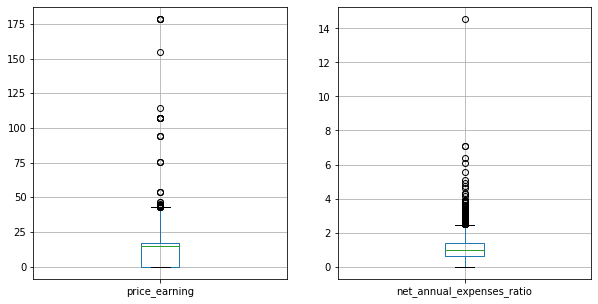

In [82]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(10,5))
data.boxplot(column='price_earning',ax=ax_1)
data.boxplot(column='net_annual_expenses_ratio',ax=ax_2)

# Task-5:Split the dataset and predictor check !

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [84]:
X = data.drop(columns = ['bonds_aaa'],axis=1)
y = data['bonds_aaa']

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

In [86]:
X_train

,total_net_assets,net_annual_expenses_ratio,portfolio_cash,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,sectors_real_estate,sectors_consumer_defensive,sectors_healthcare,sectors_utilities,sectors_communication_services,sectors_energy,sectors_industrials,sectors_technology,price_earning,bonds_us_government,morningstar_return_rating,returns_ytd,returns_2017,returns_2016,returns_2015,returns_2014,returns_2013,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,treynor_ratio_3y,age_of_fund_yrs,category_0,category_1,category_2,...,category_71,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83,category_84,category_85,category_86,category_87,category_88,category_89,category_90,category_91,category_92,category_93,category_94,category_95,category_96,category_97,category_98,category_99,category_100,category_101,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2
11468,508220000,1.64,7.38,92.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3,-3.07,4.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,0.68,1.22,0.19,3.82,1.24,2.230137,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8251,79570000,1.25,2.00,0.00,0.00,0.00,0.00,7.54,16.53,4.23,0.00,7.54,23.55,0.00,0.00,0.00,10.18,30.41,24.91,0.0,2,8.00,22.30,3.02,0.86,-0.77,35.96,13.02,1.23,31.84,3,-3.16,1.01,0.66,13.85,6.42,19.202740,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
539,616490000,2.15,1.42,29.40,0.40,0.00,6.56,1.64,8.78,21.69,5.24,10.24,9.63,4.46,3.42,11.41,16.24,7.25,15.41,0.0,2,-1.44,12.75,5.52,-3.81,0.75,9.66,9.72,-4.98,10.80,4,-4.30,1.17,0.21,7.92,1.36,15.284932,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4098,3760000000,1.51,4.03,0.00,0.00,0.00,0.00,9.48,11.02,26.59,10.00,7.52,3.52,5.11,0.00,8.60,14.12,4.06,17.42,0.0,2,-1.08,13.00,17.91,-4.48,8.01,24.75,9.25,-3.38,13.80,1,-1.31,0.85,0.67,9.88,8.49,9.460274,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
471,450000000,1.48,32.92,67.07,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2,-1.37,0.44,1.05,1.07,4.32,-2.94,1.90,0.00,0.00,3,-0.97,0.61,0.01,1.96,-0.89,7.975342,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,253380000,0.62,0.95,99.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3,-0.48,2.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,-0.66,0.76,0.14,2.62,1.22,2.098630,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9859,1790000000,1.01,5.45,73.42,0.00,0.44,1.01,7.92,32.74,5.87,0.00,3.66,6.55,1.25,6.79,5.99,11.80,17.43,15.42,0.0,5,0.78,11.35,13.45,-3.06,3.85,10.05,18.05,-0.19,17.85,5,4.62,0.26,0.46,6.46,18.23,31.575342,0.0,0.

In [87]:
y_train

11468    12.60
8251      0.00
539       0.00
4098      0.00
471      94.60
         ...  
9160     25.21
9859      6.15
11513    82.92
1688      0.00
5994      0.00
Name: bonds_aaa, Length: 8328, dtype: float64

In [88]:
lr = LinearRegression()

In [89]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
y_pred = lr.predict(X_test)

In [91]:
mse = mean_squared_error(y_test,y_pred)

In [92]:
mse

247.4294288345256

In [93]:
rmse = mse**(1/2)

In [94]:
rmse

15.729889663774683

# **Task-6:Predictor check using GridsearchCV**

In [95]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso

In [96]:
#Given
# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]


RidgeRegression

In [97]:
ridge_model = Ridge()

In [98]:
ridge_grid =GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=ridge_lambdas))

In [99]:
print(ridge_grid)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10,
                                   30, 60]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [100]:
ridge_grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58984e-26): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.39801e-26): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41106e-26): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46119e-26): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.52476e-26): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10,
                                   30, 60]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
y_pred = ridge_grid.predict(X_test)

In [102]:
y_pred

array([15.18094992, -1.4231788 ,  0.48609743, ...,  0.33884031,
       35.11656928, 40.45754108])

In [103]:
ridge_mse = mean_squared_error(y_test,y_pred)

In [104]:
print("The Ridge Mean Squared Error:",ridge_mse)

The Ridge Mean Squared Error: 246.99904925284807


In [105]:
ridge_rmse = ridge_mse**(1/2)
#ridge_rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [106]:
print("The Ridge Root Mean Squared Error:",ridge_rmse)

The Ridge Root Mean Squared Error: 15.716203398176294


LassoRegression

In [107]:
lasso_model = Lasso()

In [108]:
lasso_grid =GridSearchCV(estimator=lasso_model, param_grid=dict(alpha=lasso_lambdas))

In [109]:
print(lasso_grid)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006,
                                   0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [110]:
lasso_grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 808288.0119996368, tolerance: 376.31566221139906
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781070.6820941415, tolerance: 367.3503798249355
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789512.5622000187, tolerance: 373.43127522030227
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806052.272

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006,
                                   0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [111]:
y_pred = lasso_grid.predict(X_test)

In [112]:
lasso_mse = mean_squared_error(y_test,y_pred)

In [113]:
print("The Lasso Mean Squared Error:",lasso_mse)

The Lasso Mean Squared Error: 247.09179080748126


In [114]:
lasso_rmse = lasso_mse**(1/2)
#lasso_rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [115]:
print("The Lasso Root Mean Squared Error:",lasso_rmse)

The Lasso Root Mean Squared Error: 15.719153628852963
